# Series/Df . groupby( ) / agg( )

In [54]:
from IPython.display import Image
%matplotlib inline

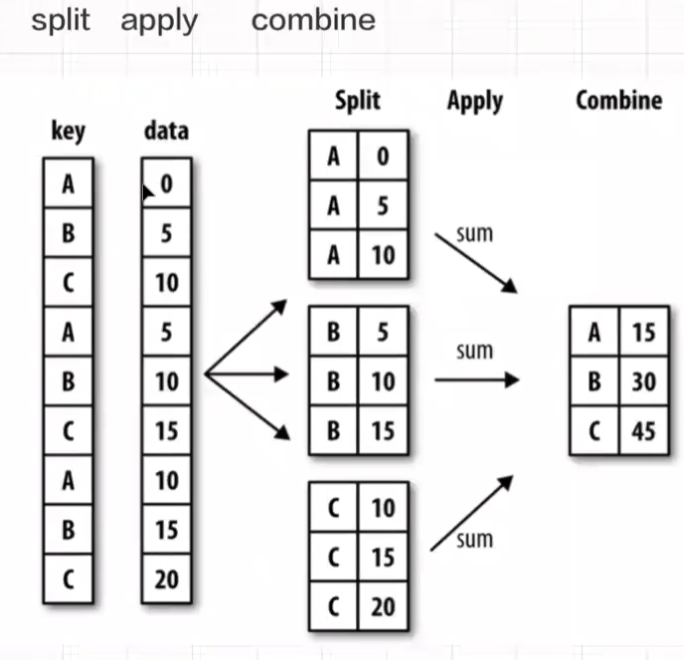

In [55]:
Image(filename='images/groupby.png', width=500) 

In [56]:
import numpy as np
import pandas as pd

df = pd.DataFrame({'key1':['a', 'a', 'b', 'b', 'a'],
                  'key2':['one', 'two', 'one', 'two', 'one'],
                  'data1': np.random.randn(5),
                  'data2':np.random.randn(5)})

df

,key1,key2,data1,data2
0,a,one,-0.239693,0.421672
1,a,two,-0.443067,-0.920845
2,b,one,-0.457005,1.077838
3,b,two,-0.820754,-0.739222
4,a,one,-1.502434,0.916017


# application 1 -  Series groupby()

In [57]:
df['data1']       #split

0   -0.239693
1   -0.443067
2   -0.457005
3   -0.820754
4   -1.502434
Name: data1, dtype: float64

In [58]:
df['data1'].groupby(['台北','台中','台中','台北','台北'])      

In [59]:
df['data1'].groupby(['台北','台中','台中','台北','台北']).mean()      #apply / combine

台中   -0.450036
台北   -0.854294
Name: data1, dtype: float64

In [60]:
df['data1'].groupby([2005, 2005, 2006, 2005, 2006]).sum()

2005   -1.503514
2006   -1.959439
Name: data1, dtype: float64

In [61]:
states = ['台北','台中','台中','台北','台北']
years = [2005, 2005, 2006, 2005, 2006]
df['data1'].groupby([states, years]).sum()

台中  2005   -0.443067
    2006   -0.457005
台北  2005   -1.060447
    2006   -1.502434
Name: data1, dtype: float64

# application 2 

In [62]:
df

,key1,key2,data1,data2
0,a,one,-0.239693,0.421672
1,a,two,-0.443067,-0.920845
2,b,one,-0.457005,1.077838
3,b,two,-0.820754,-0.739222
4,a,one,-1.502434,0.916017


In [63]:
df['key1']

0    a
1    a
2    b
3    b
4    a
Name: key1, dtype: object

In [64]:
df['data2']

0    0.421672
1   -0.920845
2    1.077838
3   -0.739222
4    0.916017
Name: data2, dtype: float64

In [65]:
df['data2'].groupby(df['key1']).sum()

key1
a    0.416843
b    0.338616
Name: data2, dtype: float64

In [66]:
df['data2'].groupby(df['key2']).sum()

key2
one    2.415527
two   -1.660068
Name: data2, dtype: float64

In [67]:
df['data2'].groupby([df['key1'],df['key2']]).sum()

key1  key2
a     one     1.337689
      two    -0.920845
b     one     1.077838
      two    -0.739222
Name: data2, dtype: float64

# application 3 : DataFrame.groupby( )

In [68]:
df

,key1,key2,data1,data2
0,a,one,-0.239693,0.421672
1,a,two,-0.443067,-0.920845
2,b,one,-0.457005,1.077838
3,b,two,-0.820754,-0.739222
4,a,one,-1.502434,0.916017


In [69]:
df.groupby(['key1','key2'])

In [70]:
df.groupby(['key1','key2']).sum()

data1     data2
key1 key2                    
a    one  -1.742127  1.337689
     two  -0.443067 -0.920845
b    one  -0.457005  1.077838
     two  -0.820754 -0.739222

In [71]:
df.groupby(['key1','key2'])[['data1','data2']].sum()

data1     data2
key1 key2                    
a    one  -1.742127  1.337689
     two  -0.443067 -0.920845
b    one  -0.457005  1.077838
     two  -0.820754 -0.739222

In [72]:
df.groupby(['key1','key2'])['data1']

In [73]:
df.groupby(['key1','key2'])['data1'].sum()

key1  key2
a     one    -1.742127
      two    -0.443067
b     one    -0.457005
      two    -0.820754
Name: data1, dtype: float64

# application 4 : 同時多個apply( )------->agg( )

In [74]:
df

,key1,key2,data1,data2
0,a,one,-0.239693,0.421672
1,a,two,-0.443067,-0.920845
2,b,one,-0.457005,1.077838
3,b,two,-0.820754,-0.739222
4,a,one,-1.502434,0.916017


In [75]:
#加總和平均
df.groupby(by=['key1']).agg(['sum','mean','min'])

C:\Users\user\AppData\Local\Temp\ipykernel_1296\2633286126.py:2: FutureWarning: ['key2'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby(by=['key1']).agg(['sum','mean','min'])


data1                         data2                    
           sum      mean       min       sum      mean       min
key1                                                            
a    -2.185194 -0.728398 -1.502434  0.416843  0.138948 -0.920845
b    -1.277759 -0.638879 -0.820754  0.338616  0.169308 -0.739222

In [76]:
#加總和平均,自訂的function
def peak_to_peak(x):
    return x.max() - x.min()

df.groupby(by=['key1']).agg(['sum','mean',peak_to_peak])

C:\Users\user\AppData\Local\Temp\ipykernel_1296\4059078462.py:5: FutureWarning: ['key2'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby(by=['key1']).agg(['sum','mean',peak_to_peak])


data1                            data2                       
           sum      mean peak_to_peak       sum      mean peak_to_peak
key1                                                                  
a    -2.185194 -0.728398     1.262741  0.416843  0.138948     1.836862
b    -1.277759 -0.638879     0.363749  0.338616  0.169308     1.817061

# Example 1

In [77]:
import numpy as np
import pandas as pd

tips = pd.read_csv('tips.csv')
tips

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [78]:
tips.columns = ['總票價', '小費', '吸煙者', '日期', '時間', '大小']
tips['小費比例'] = tips['小費'] / tips['總票價']
tips

,總票價,小費,吸煙者,日期,時間,大小,小費比例
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,No,Sat,Dinner,2,0.098204


In [79]:
grouped = tips.groupby(['吸煙者','日期'])
grouped_pct= grouped['小費'].agg('mean')
grouped_pct

吸煙者  日期  
No   Fri     2.812500
     Sat     3.102889
     Sun     3.167895
     Thur    2.673778
Yes  Fri     2.714000
     Sat     2.875476
     Sun     3.516842
     Thur    3.030000
Name: 小費, dtype: float64

In [80]:
grouped_pct.unstack()

日期,Fri,Sat,Sun,Thur
吸煙者,,,,
No,2.8125,3.102889,3.167895,2.673778
Yes,2.7140,2.875476,3.516842,3.030000


In [81]:
grouped_pct.unstack('吸煙者')

吸煙者,No,Yes
日期,,
Fri,2.812500,2.714000
Sat,3.102889,2.875476
Sun,3.167895,3.516842
Thur,2.673778,3.030000


In [85]:
grouped

In [87]:
grouped_pct1 = grouped['小費'].agg(['mean','std'])
grouped_pct1

mean       std
吸煙者 日期                      
No  Fri   2.812500  0.898494
    Sat   3.102889  1.642088
    Sun   3.167895  1.224785
    Thur  2.673778  1.282964
Yes Fri   2.714000  1.077668
    Sat   2.875476  1.630580
    Sun   3.516842  1.261151
    Thur  3.030000  1.113491

In [89]:
grouped_pct1 = grouped['小費'].agg([('平均','mean'),('標準差','std')])
grouped_pct1

平均       標準差
吸煙者 日期                      
No  Fri   2.812500  0.898494
    Sat   3.102889  1.642088
    Sun   3.167895  1.224785
    Thur  2.673778  1.282964
Yes Fri   2.714000  1.077668
    Sat   2.875476  1.630580
    Sun   3.516842  1.261151
    Thur  3.030000  1.113491

In [90]:
grouped_pct1.stack()

吸煙者  日期       
No   Fri   平均     2.812500
           標準差    0.898494
     Sat   平均     3.102889
           標準差    1.642088
     Sun   平均     3.167895
           標準差    1.224785
     Thur  平均     2.673778
           標準差    1.282964
Yes  Fri   平均     2.714000
           標準差    1.077668
     Sat   平均     2.875476
           標準差    1.630580
     Sun   平均     3.516842
           標準差    1.261151
     Thur  平均     3.030000
           標準差    1.113491
dtype: float64

In [91]:
grouped_pct1.stack().unstack(['吸煙者',2])

吸煙者         No                 Yes          
            平均       標準差        平均       標準差
日期                                          
Fri   2.812500  0.898494  2.714000  1.077668
Sat   3.102889  1.642088  2.875476  1.630580
Sun   3.167895  1.224785  3.516842  1.261151
Thur  2.673778  1.282964  3.030000  1.113491

In [92]:
grouped[['小費','總票價']].agg([('平均','mean'),('標準差','std')])

小費                  總票價           
                平均       標準差         平均        標準差
吸煙者 日期                                            
No  Fri   2.812500  0.898494  18.420000   5.059282
    Sat   3.102889  1.642088  19.661778   8.939181
    Sun   3.167895  1.224785  20.506667   8.130189
    Thur  2.673778  1.282964  17.113111   7.721728
Yes Fri   2.714000  1.077668  16.813333   9.086388
    Sat   2.875476  1.630580  21.276667  10.069138
    Sun   3.516842  1.261151  24.120000  10.442511
    Thur  3.030000  1.113491  19.190588   8.355149

# Example 2

In [ ]:
from IPython.display import Image
%matplotlib inline

In [94]:
import numpy as np
import pandas as pd
import requests

url = 'https://data.ntpc.gov.tw/api/datasets/71CD1490-A2DF-4198-BEF1-318479775E8A/json?page=0&size=1000'

response = requests.request('GET',url)
if response.ok:
    print("下載成功")
    print(type(response.text))
    allData = response.json()

print(type(allData))

下載成功
<class 'str'>
<class 'list'>


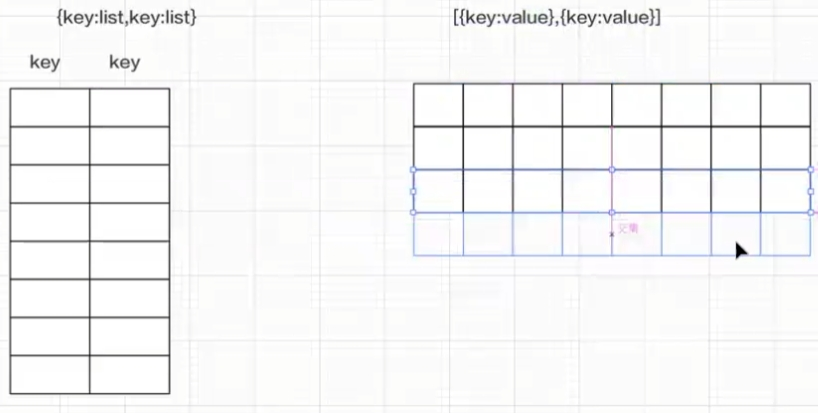

In [95]:
Image(filename='images/2.png', width=500) 

In [99]:
for items in allData:
    print(items)
    print("===============================================================================================")

{'sno': '1001', 'sna': '大鵬華城', 'tot': '12', 'sbi': '2', 'sarea': '新店區', 'mday': '20230924135941', 'lat': '24.99116', 'lng': '121.53398', 'ar': '新北市新店區中正路700巷3號', 'sareaen': 'Xindian Dist.', 'snaen': 'Dapeng Community', 'aren': 'No. 3, Lane 700 Chung Cheng Road, Xindian District', 'bemp': '9', 'act': '1'}
{'sno': '1002', 'sna': '汐止火車站', 'tot': '22', 'sbi': '10', 'sarea': '汐止區', 'mday': '20230924135938', 'lat': '25.068914', 'lng': '121.662748', 'ar': '南昌街/新昌路口(西側廣場)', 'sareaen': 'Xizhi Dist.', 'snaen': 'Xizhi Railway Station', 'aren': 'Nanchang St./Xinchang Rd.', 'bemp': '8', 'act': '1'}
{'sno': '1003', 'sna': '汐止區公所', 'tot': '24', 'sbi': '9', 'sarea': '汐止區', 'mday': '20230924135943', 'lat': '25.064162', 'lng': '121.658301', 'ar': '新台五路一段/仁愛路口(新台五路側汐止地政事務所前機車停車場)', 'sareaen': 'Xizhi Dist.', 'snaen': 'Xizhi Dist. Office', 'aren': 'Sec. 1, Xintai 5th Rd./Ren’ai Rd.', 'bemp': '14', 'act': '1'}
{'sno': '1004', 'sna': '國泰綜合醫院', 'tot': '28', 'sbi': '26', 'sarea': '汐止區', 'mday': '20230924135936

https://jsonviewer.stack.hu/

In [96]:
df_all = pd.DataFrame(allData,columns=['sna', 'tot', 'sbi', 'sarea', 'ar', 'bemp'])   #有選取欄位的功能
df_all.columns = ['站名','數量','可借','區域','地址','可還']
df_all

,站名,數量,可借,區域,地址,可還
0,大鵬華城,12,2,新店區,新北市新店區中正路700巷3號,9
1,汐止火車站,22,10,汐止區,南昌街/新昌路口(西側廣場),8
2,汐止區公所,24,9,汐止區,新台五路一段/仁愛路口(新台五路側汐止地政事務所前機車停車場),14
3,國泰綜合醫院,28,26,汐止區,建成路78號對面停車場,2
4,捷運大坪林站(5號出口),26,7,新店區,中興路三段224號(對面),19
...,...,...,...,...,...,...
626,龍米停車場,10,3,八里區,龍米路二段150號(旁),7
627,雙和醫院,18,0,中和區,中正路281號(公車亭旁),18
628,寶高智慧產業園區,30,3,新店區,寶高路10號(旁),24
629,捷運三重站(1號出口),14,5,三重區,捷運路36號(旁),10


In [ ]:
df_all.info()

### (str( )轉int( ))----方法一


In [ ]:
df_all['數量'].map(lambda x:int(x))

### (str( )轉int( ))----方法二.astype( )

In [ ]:
df_all[['數量','可借','可還']] = df_all[['數量','可借','可還']].astype(int)

In [ ]:
df_all.info()

In [100]:
df_all

,站名,數量,可借,區域,地址,可還
0,大鵬華城,12,2,新店區,新北市新店區中正路700巷3號,9
1,汐止火車站,22,10,汐止區,南昌街/新昌路口(西側廣場),8
2,汐止區公所,24,9,汐止區,新台五路一段/仁愛路口(新台五路側汐止地政事務所前機車停車場),14
3,國泰綜合醫院,28,26,汐止區,建成路78號對面停車場,2
4,捷運大坪林站(5號出口),26,7,新店區,中興路三段224號(對面),19
...,...,...,...,...,...,...
626,龍米停車場,10,3,八里區,龍米路二段150號(旁),7
627,雙和醫院,18,0,中和區,中正路281號(公車亭旁),18
628,寶高智慧產業園區,30,3,新店區,寶高路10號(旁),24
629,捷運三重站(1號出口),14,5,三重區,捷運路36號(旁),10


In [101]:
max_send = df_all['可借'].max()
min_send = df_all['可借'].min()
max_send_df = df_all.query('可借==@max_send')
min_send_df = df_all.query('可借==@min_send')
min_send_df

,站名,數量,可借,區域,地址,可還
8,捷運三重站(3號出口),14,0,三重區,捷運路/捷運路37巷,11
13,後港公園,10,0,新莊區,建安街/建安街57巷,9
22,原興廣場,12,0,汐止區,原興路/中興路150巷,12
23,文化白雲公園,52,0,汐止區,水源路二段42號訖水源路二段68號,51
27,中和公園,14,0,中和區,安樂路/得和路(西南側),14
...,...,...,...,...,...,...
601,中華城林路口,32,0,土城區,中華路二段175號(前),32
602,中山八德街口,18,0,樹林區,中山路二段10號對面人行道,18
606,中央慶利街口(風華綠中央社區),10,0,土城區,中央路二段288號(前),10
619,四維國凱街口(立天下社區),40,0,樹林區,四維路121號(旁),38


In [102]:
max_back = df_all['可還'].max()
min_back = df_all['可還'].min()
max_back_df = df_all.query('可還==@max_back')
min_back_df = df_all.query('可還==@min_back')

In [103]:
min_send_df.groupby('區域')['可借'].agg('size')

區域
三重區    6
中和區    9
五股區    2
土城區    8
新店區    4
新莊區    3
板橋區    8
樹林區    7
永和區    4
汐止區    2
泰山區    2
淡水區    3
蘆洲區    2
金山區    1
Name: 可借, dtype: int64

In [104]:
min_back_df.groupby('區域')['可還'].size()

區域
中和區    1
板橋區    1
林口區    1
永和區    2
泰山區    1
淡水區    1
Name: 可還, dtype: int64

In [105]:
def top(df):
    return df.sort_values(by='可借')[:3]



df_all.groupby('區域').apply(top)

站名  數量  可借   區域                            地址  可還
區域                                                                        
三峽區 520              復興民生街口  18  10  三峽區                     復興路45號(前)   7
    272               恩主公醫院  32  10  三峽區           復興路372號(對面公車亭後方人行道)  20
    306                龍埔公園  18  11  三峽區                  新北市三峽區國光街85號   7
三重區 557           後竹圍市民活動中心  10   0  三重區               後竹圍街175巷18號(對面)   9
    8           捷運三重站(3號出口)  14   0  三重區                    捷運路/捷運路37巷  11
    491              文中小停車場  10   0  三重區                    名源街54號(對面)  10
中和區 627                雙和醫院  18   0  中和區                 中正路281號(公車亭旁)  18
    27                 中和公園  14   0  中和區                  安樂路/得和路(西南側)  14
    76             中和國民運動中心  10   0  中和區                    和城路一段/中正二橋  10
五股區 406                民義公園  32   0  五股區             五福路五福路6巷口(五福橋旁公園)  32
    448           新北市工商展覽中心  46   0  五股區                   五工六路35號(對面)  39
    493               御史路1巷  14   1  五股區                    御史路1巷5號(旁)  12
八里區 356               龍形停車場  20  10  八里區              龍米路一段318號(對面停車場)   8
    338                下庄市場  24  13  八里區                       舊城路19號前  11
    507                大崁國小  30  13  八里區                      忠八街2號(前)  17
土城區 139              金城忠義路口  10   0  土城區                     金城路一段/忠義路   9
    606     中央慶利街口(風華綠中央社區)  10   0  土城區                  中央路二段288號(前)  10
    601              中華城林路口  32   0  土城區                  中華路二段175號(前)  32
新店區 592              安居公教住宅  18   0  新店區                     安忠路52號(前)  18
    495                 光明街  12   0  新店區                   光明街185號(對面)  11
    59                 中正國小  18   0  新店區              三民路36號-42-1號前機車格  17
新莊區 13                 後港公園  10   0  新莊區                    建安街/建安街57巷   9
    457                新泰國中  10   0  新莊區                    新泰路359號(旁)  10
    298               伊吉邦社區  10   0  新莊區            新莊區新北大道7段312號(人行道)  10
板橋區 127                莊敬公園  10   0  板橋區      萬板路/民生路二段(鄰近板橋萬板親子圖書閱覽室)  10
    588      華江一華江六路口(仰真社區)  18   0  板橋區                  華江一路379號(旁)   18
    154            國光里(國光路)  12   0  板橋區                       國光路76號旁   0
林口區 476                崇林國中  26   1  林口區                   麗園路121號(對面)  25
    249              林口自強公園  22   1  林口區                    自強三街3號旁人行道  21
    260            南勢市民活動中心  22  10  林口區                     南勢二街154號旁  12
樹林區 619       四維國凱街口(立天下社區)  40   0  樹林區                    四維路121號(旁)  38
    369            東陽市民活動中心  20   0  樹林區               鎮前街467號(活動中心路側)  20
    366           文林國小(潭興街)  22   0  樹林區               潭興街65號(對面汽車停車格)  21
永和區 35                 頂溪國小  10   0  永和區      文化路133號(西側)(鄰近永和親子圖書閱覽室)  10
    397                 福和橋  10   0  永和區                    環河東路三段90號前  10
    39          捷運頂溪站(1號出口)  18   0  永和區                       中興街1號對面  17
汐止區 23               文化白雲公園  52   0  汐止區             水源路二段42號訖水源路二段68號  51
    22                 原興廣場  12   0  汐止區                   原興路/中興路150巷  12
    618  福德一路201巷口(福德ONE社區)  10   1  汐止區                  福德一路205號(對面)   8
泰山區 121                明志國小  64   0  泰山區        明志路二段324號對面人行道(鄰近明志書院)   0
    549            台北花園廣場社區  22   0  泰山區                  泰林路二段454號(旁)  22
    175                同興公園  16   1  泰山區                      仁義路15號對面  14
淡水區 515             美麗新淡海影城  24   0  淡水區          新市五路三段/義山路二段(西北側人行道)  22
    485             輕軌新市一路站  28   0  淡水區              新市一路三段151號(旁人行道)  27
    482            輕軌淡海新市鎮站  24   0  淡水區         沙崙路二段/新市三路二段口(東北側人行道)  24
深坑區 312              東南科技大學  34   1  深坑區           深坑區北深路三段170號(對面機車格)  33
    560               深坑松柏街  14   1  深坑區                    松柏街24號(對面)  13
    614               深坑雲鄉路  10   1  深坑區               雲鄉路1號(旁橋下汽車停車格)   9
蘆洲區 30                 中原公園  10   0  蘆洲區                     長興路22號前通道  10
    412              蘆洲中路公園  10   0  蘆洲區                  光華路87巷7號(右側)  10
    511             仁愛街70巷口  12   1  蘆洲區                    仁愛街95號(對面)  11
金山區 561                金美國小  28   0  金山區          

In [106]:
def top1(df):
    return df.sort_values(by='可還')[:3]



df_all.groupby('區域').apply(top1)

站名  數量  可借   區域                                 地址  可還
區域                                                                          
三峽區 235     國立臺北大學(三峽校區)  30  17  三峽區        學勤路大學路口(面校門右側人行道)(鄰近國立台北大學)  10
    258        三峽區礁溪行政中心  16   4  三峽區                         光明路71號(左側)  10
    331             安溪國中  26  13  三峽區               三峽區中正路一段/大同路(人行道路橋旁)  10
三重區 629      捷運三重站(1號出口)  14   5  三重區                          捷運路36號(旁)  10
    491           文中小停車場  10   0  三重區                         名源街54號(對面)  10
    19              明志國中  12   2  三重區                           中正北路107號  10
中和區 24              秀山國小  10  10  中和區                       更生街/自立路(西南側)   0
    156         華福市民活動中心  10   9  中和區                      民德路296號對面停車格位   1
    76          中和國民運動中心  10   0  中和區                         和城路一段/中正二橋  10
五股區 240    新北市立圖書館五股成功分館  26  14  五股區              西雲路165號圖書館旁空地(鄰近西雲禪寺)  11
    487             陸光國宅  14   3  五股區                   民義路1段/民義路1段183巷口  11
    577         成泰路4段22巷  18   5  五股區                    成泰路4段22巷29號(對面)  11
八里區 338             下庄市場  24  13  八里區                            舊城路19號前  11
    597           八里行政中心  30  18  八里區               十三行路(靠中山路二段路口西南側人行道)  12
    507             大崁國小  30  13  八里區                           忠八街2號(前)  17
土城區 606  中央慶利街口(風華綠中央社區)  10   0  土城區                       中央路二段288號(前)  10
    286             清水高中  10   0  土城區                        土城區明德路一段72號  10
    261             青山廣場  10   0  土城區               明德路一段240巷1號(雜貨店前人行道)  10
新店區 517          安康立體停車場  10   9  新店區                           安德街2號(前)   1
    32           小金門友誼公園  20   5  新店區                            民族路/建興街  10
    526           青潭河濱公園  14   2  新店區                    新烏路一段11弄11號(對面)  10
新莊區 298            伊吉邦社區  10   0  新莊區                 新莊區新北大道7段312號(人行道)  10
    456            新莊田徑場  18   8  新莊區                     復興路一段209號 (對面)  10
    457             新泰國中  10   0  新莊區                         新泰路359號(旁)  10
板橋區 154         國光里(國光路)  12   0  板橋區                            國光路76號旁   0
    91          板橋國民運動中心  16   6  板橋區                            英士路/智樂路  10
    617    藝文藝文二街口(大悅社區)  22   8  板橋區                  藝文街/藝文二街口(東南側人行道)  10
林口區 378        新北市林口行政園區  28  27  林口區   忠孝二路55號(鄰近MITSUI OUTLET PARK 林口)   0
    407             大崙公園  16   6  林口區                          南勢二街408號旁  10
    405           廣停二停車場  26  14  林口區                         民富街99號(對面)  10
樹林區 279             三多國小  20   9  樹林區                   三福街83-89號(對面人行道)  10
    439           學成大成路口  20   8  樹林區                         學成路712號(旁)  10
    161        樹林火車站(後站)  28   9  樹林區                         後站街6巷11號對面  11
永和區 314          永和國父紀念館  10   9  永和區                     永和區國光路9號(前人行道)   0
    383              名利橋  10  10  永和區                   仁愛路352巷96號(對面廣場)   0
    35              頂溪國小  10   0  永和區           文化路133號(西側)(鄰近永和親子圖書閱覽室)  10
汐止區 117            五堵火車站  24  13  汐止區                          鄉長路一段人行道側  10
    5           汐科火車站(北)  16   5  汐止區  大同路二段184巷/龍安路202巷(西側)(汐科火車站北站出口前)  11
    9               樟樹國小  20   7  汐止區                      樟樹二路/樟樹一路141巷  12
泰山區 121             明志國小  64   0  泰山區             明志路二段324號對面人行道(鄰近明志書院)   0
    168             義學國小  14   4  泰山區                        民生路33號對面人行道  10
    175             同興公園  16   1  泰山區                           仁義路15號對面  14
淡水區 604          輕軌漁人碼頭站  10   8  淡水區              中正路二段/中正路二段51巷口(輕軌站旁)   0
    528            公23公園  14   3  淡水區                       新市五路二段1號(對面)  10
    428         台北海洋科技大學  18   4  淡水區                    濱海路三段150號(校門左側)  11
深坑區 560            深坑松柏街  14   1  深坑區                         松柏街24號(對面)  13
    312           東南科技大學  34   1  深坑區                深坑區北深路三段170號(對面機車格)  33
    311      深坑區公所(深坑老街)  44   2  深坑區  新北市深坑區文化街45號(兒童公園旁)(鄰近深坑集順廟/深坑老街)  40
蘆洲區 30              中原公園  10   0  蘆洲區                          長興路22號前通道  10
    412           蘆洲中路公園  10   0  蘆洲區                       光華路87巷7號(右側)  10
    167          三